In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1116,2020-07-25,United Kingdom,298060.0,297914.0,45680.0,45677.0,146.0,3.0
1117,2020-07-25,Germany,204779.0,204964.0,9124.0,9118.0,-185.0,6.0
1118,2020-07-25,Iran,287453.0,284034.0,15265.0,15074.0,3419.0,191.0
1119,2020-07-25,Turkey,224184.0,224252.0,5581.0,5580.0,-68.0,1.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  3353.013380909902
RMSE =  9172.191643400443


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  291.1418376449599
RMSE =  686.6086745010502


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  18128.833333333332
RMSE =  25937.891478170182
-- World performances for deaths --
MAE =  1550.7037037037037
RMSE =  1892.7888203702278


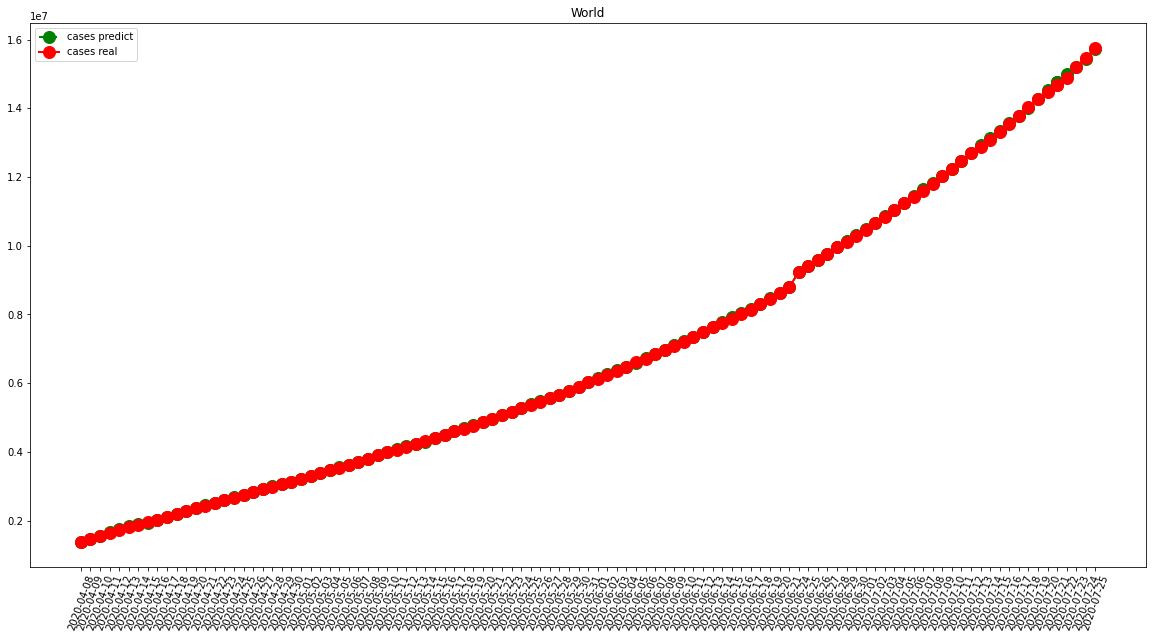

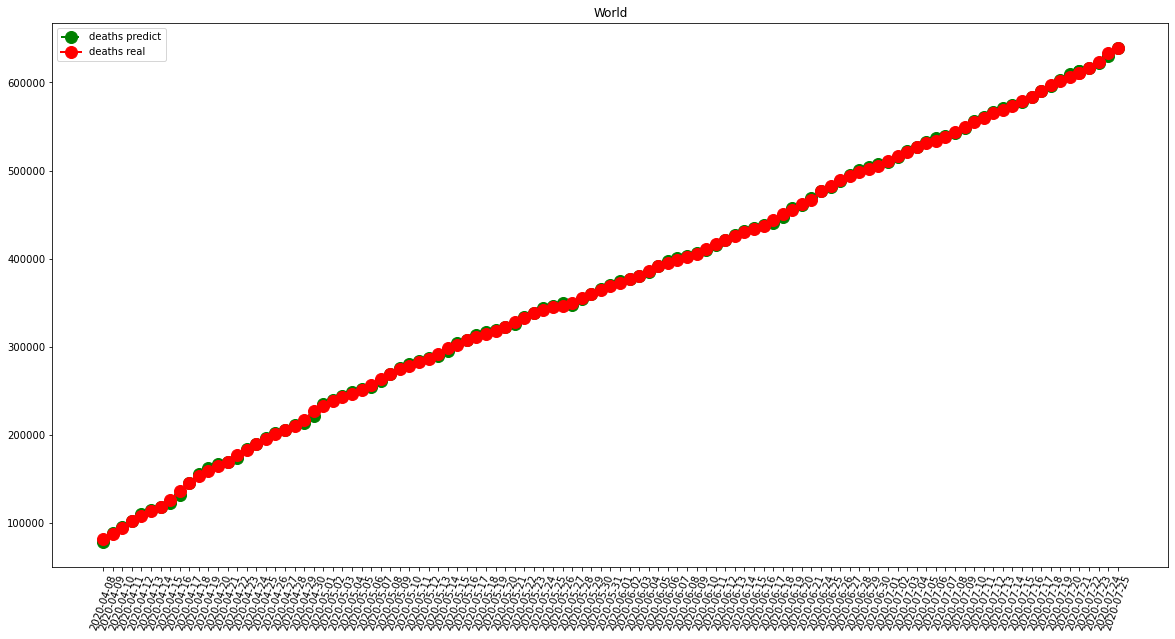

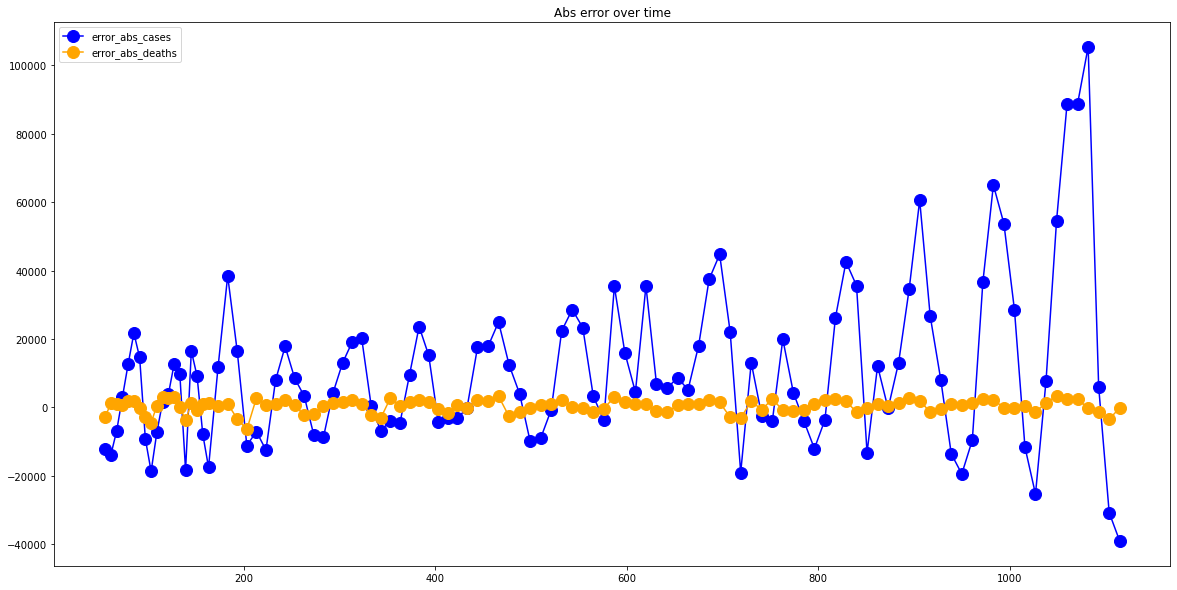

In [7]:
visShow("World")

-- France performances for cases --
MAE =  841.8728813559322
RMSE =  1372.8910945982273
-- France performances for deaths --
MAE =  152.40677966101694
RMSE =  308.51324725011983


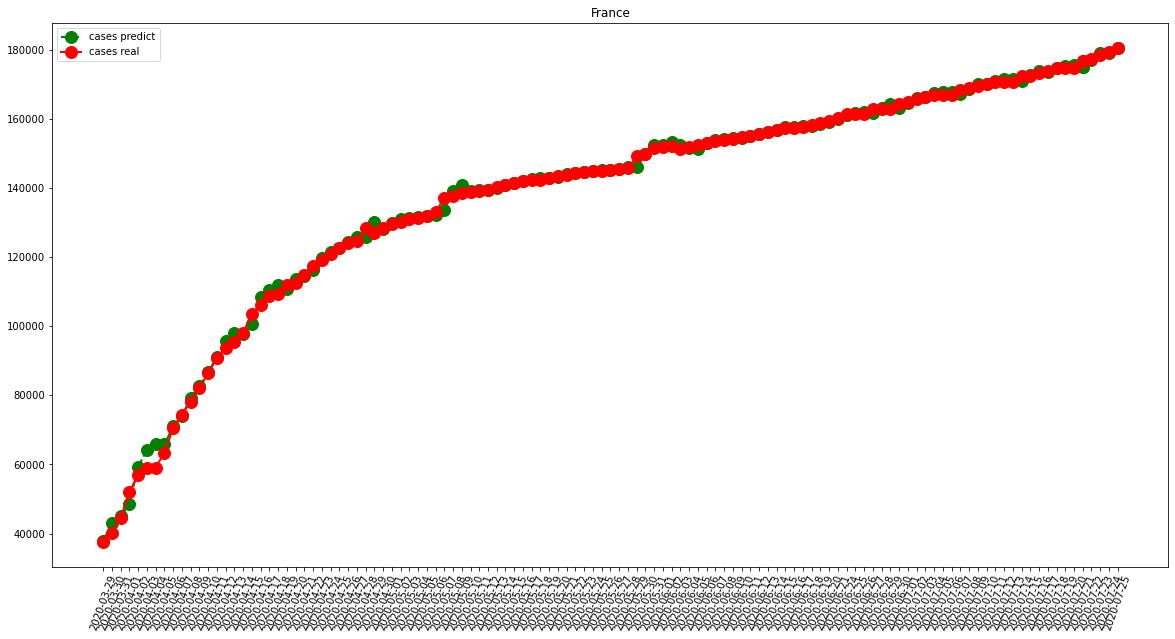

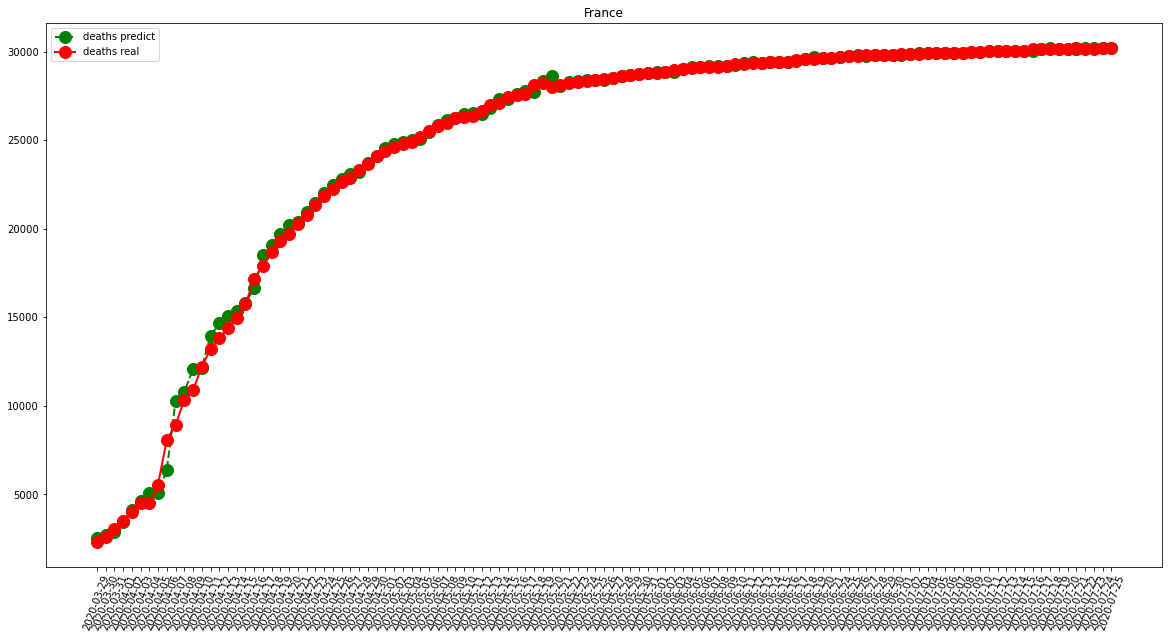

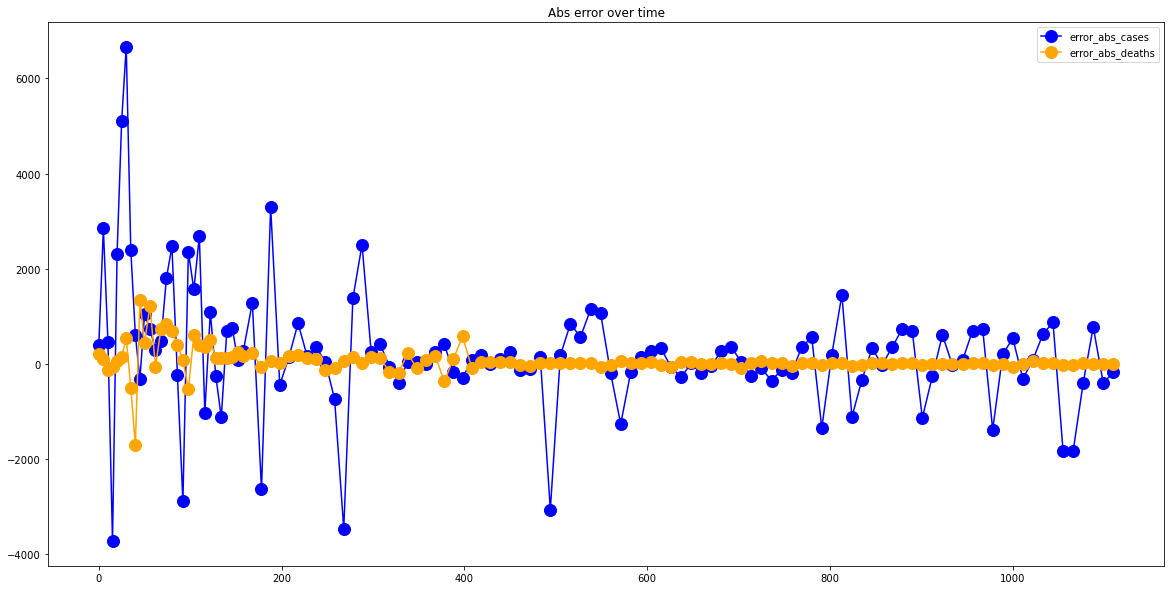

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  334.2542372881356
RMSE =  502.3026469694763
-- Italy performances for deaths --
MAE =  86.32203389830508
RMSE =  272.4204128840792


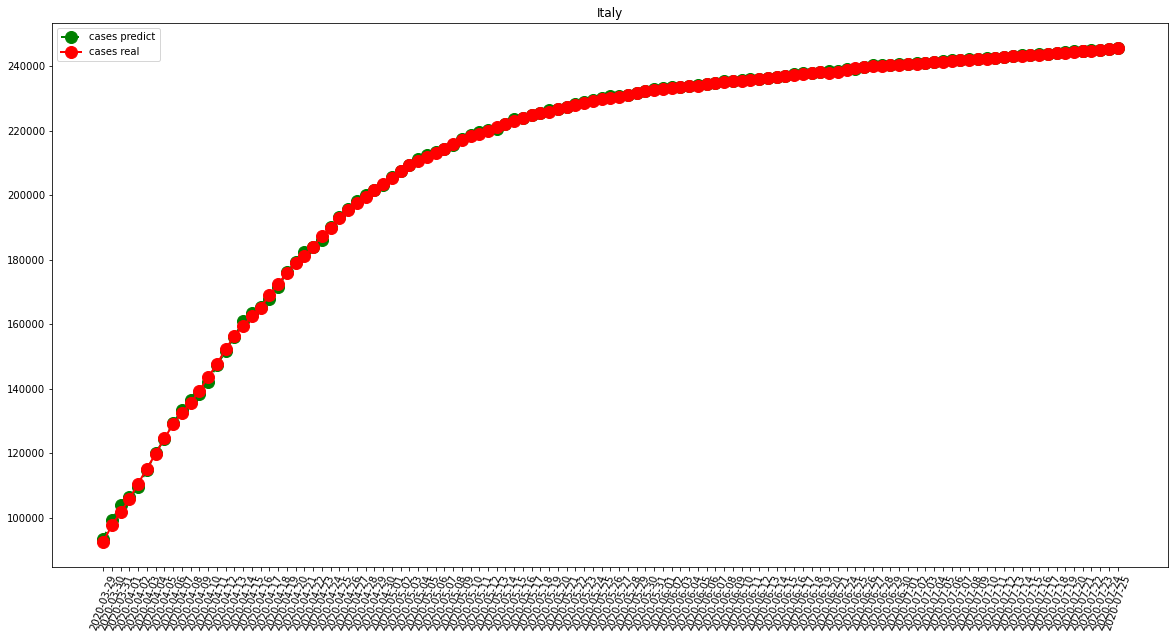

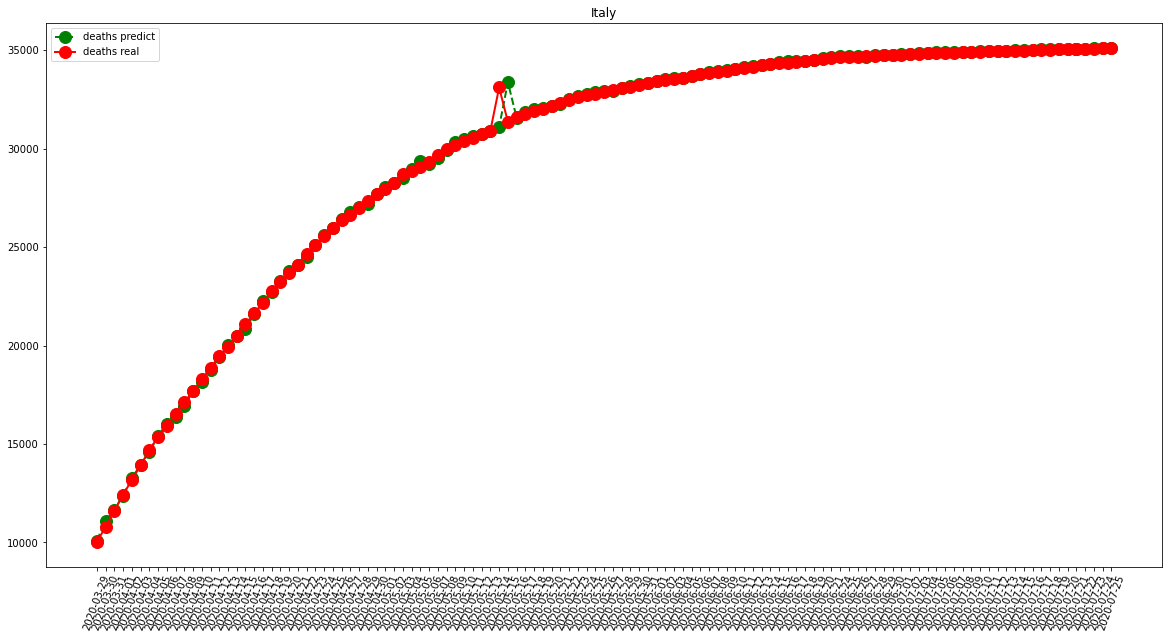

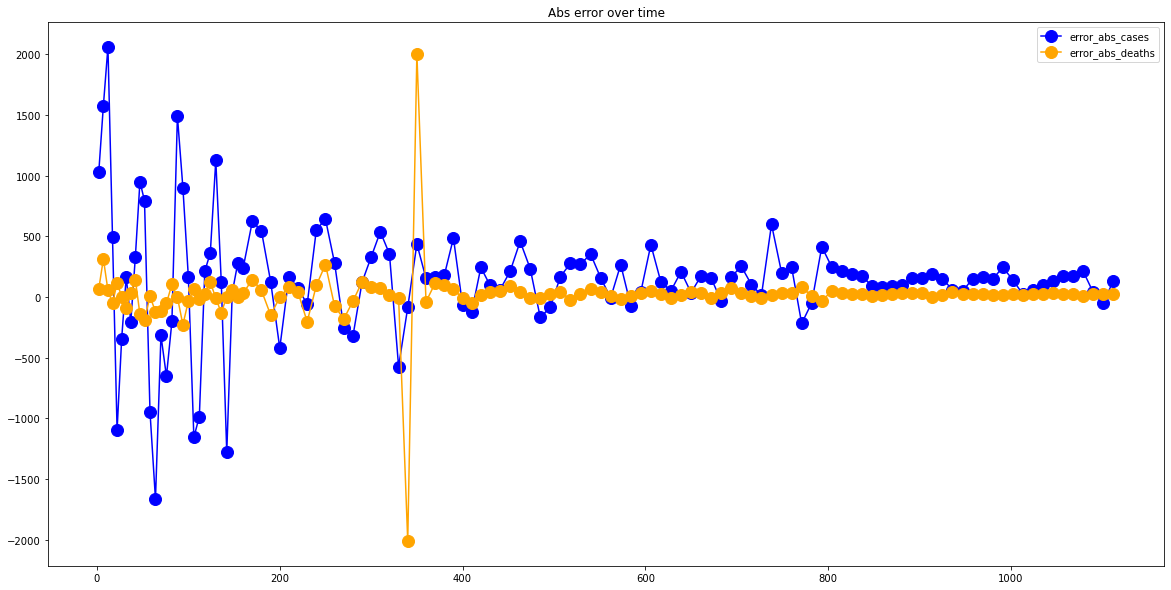

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  938.9915254237288
RMSE =  2022.0902823982642
-- Spain performances for deaths --
MAE =  155.54237288135593
RMSE =  373.67540069523676


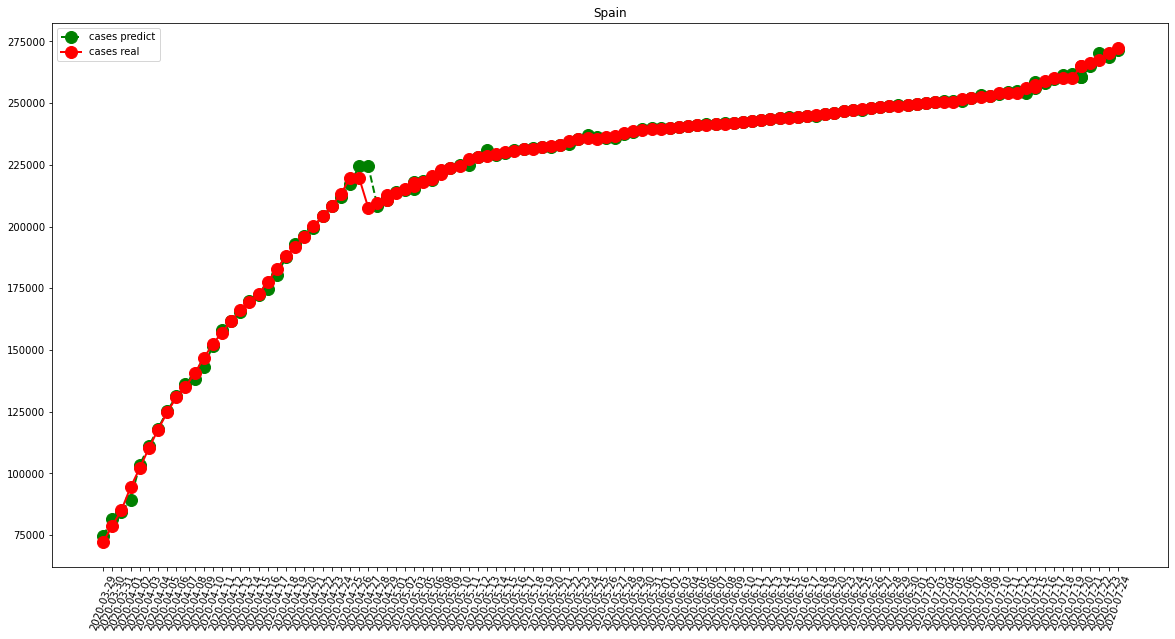

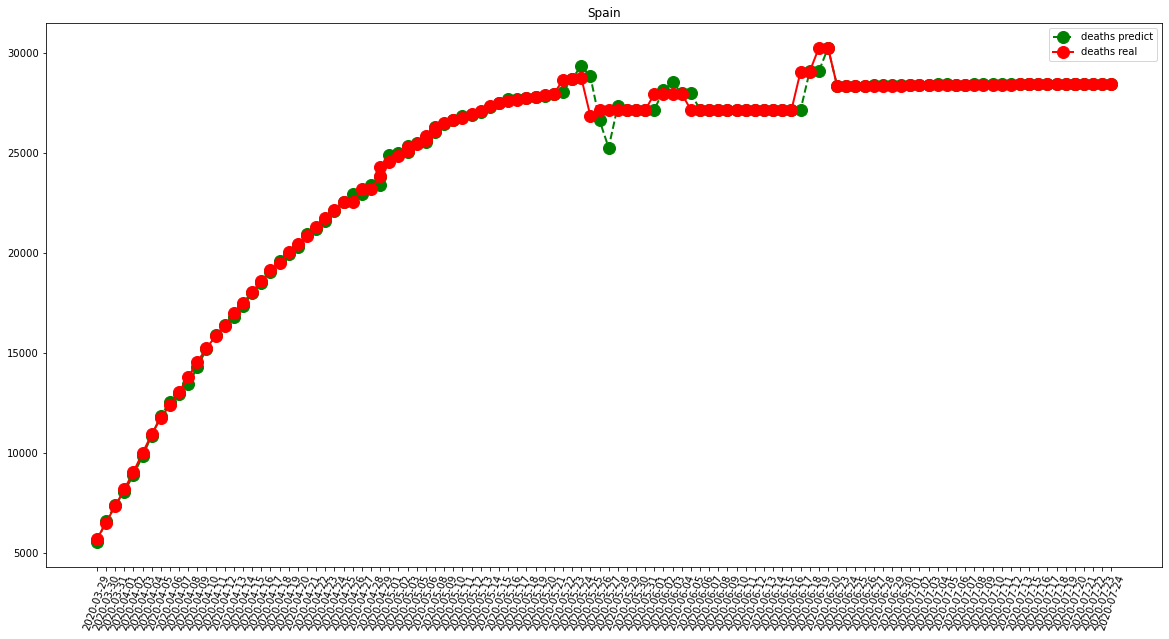

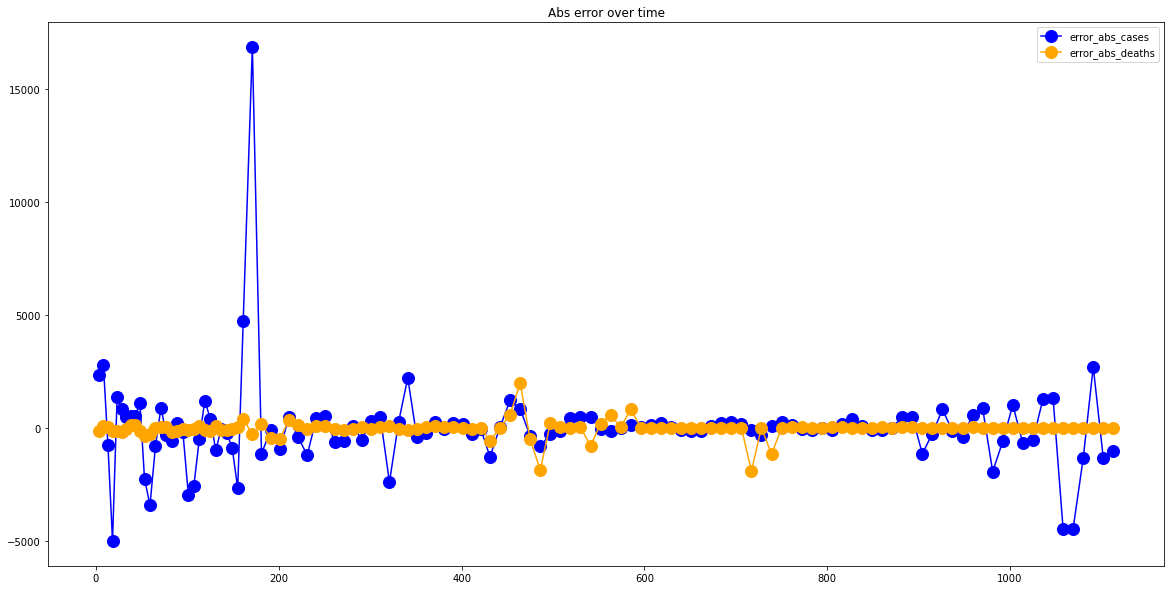

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  5550.567796610169
RMSE =  7459.779553815611
-- United States performances for deaths --
MAE =  506.70338983050846
RMSE =  735.638550017049


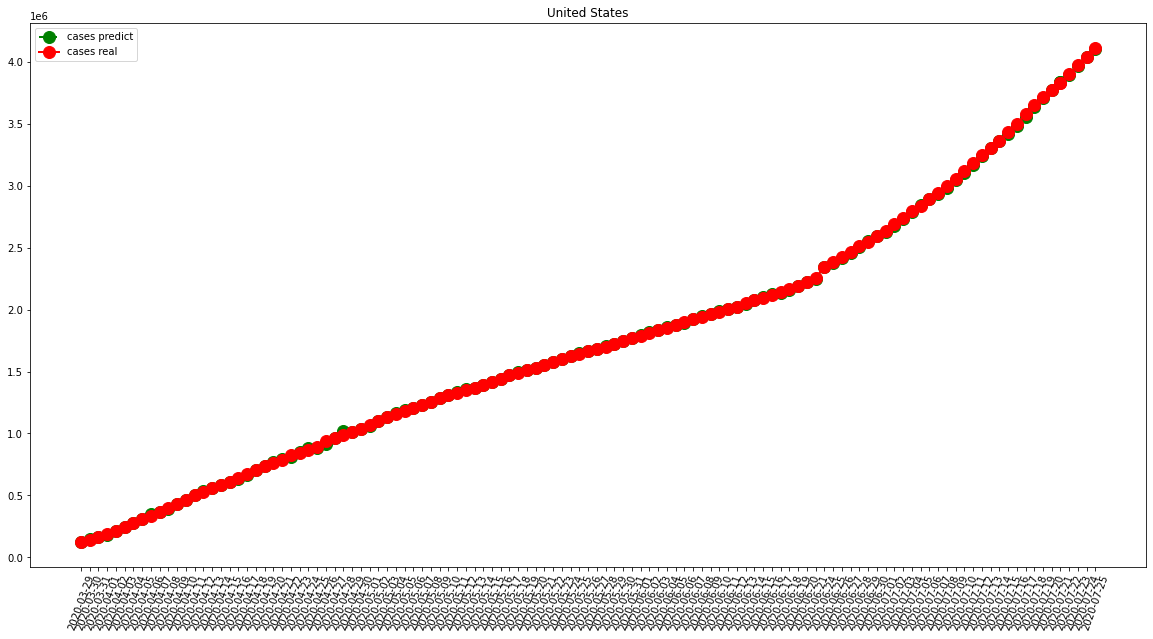

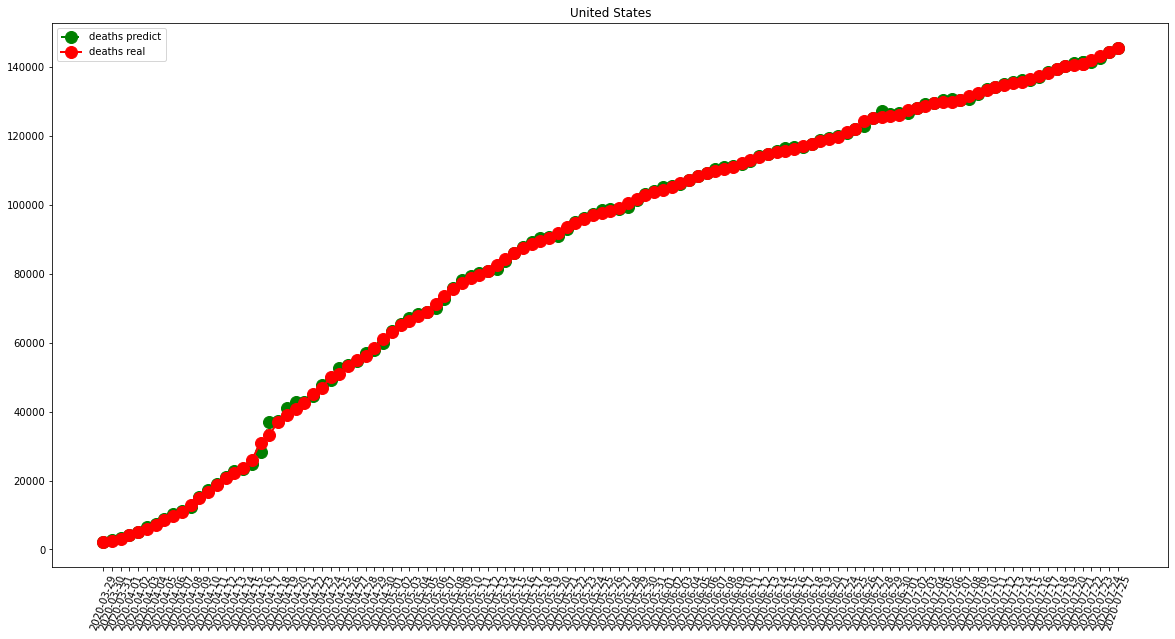

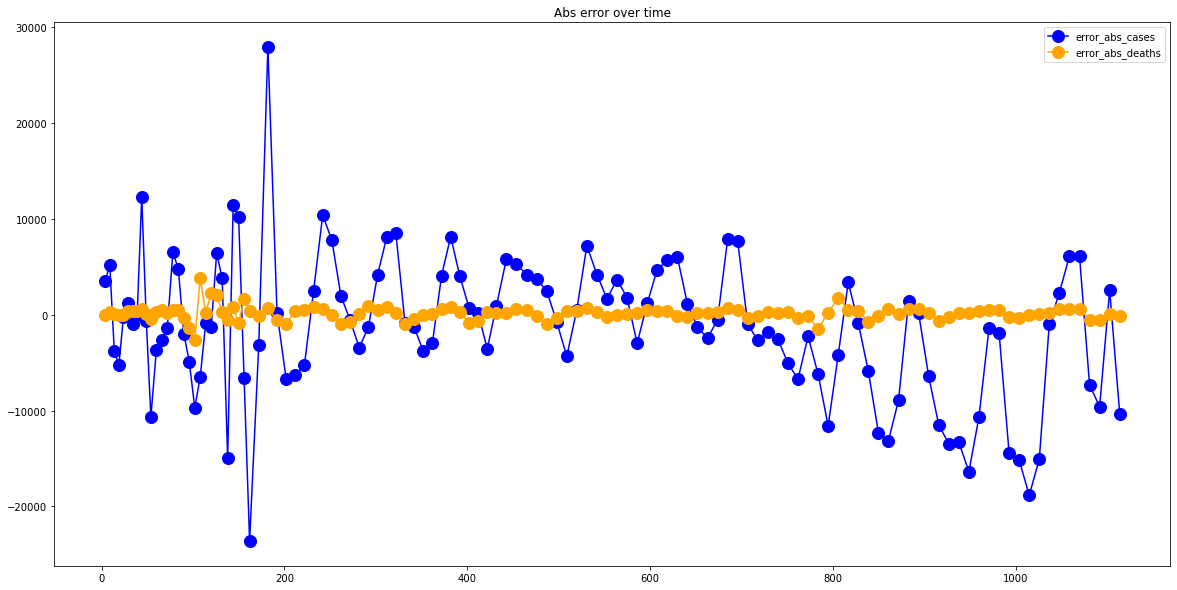

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  79.46610169491525
RMSE =  109.07628336728538
-- China performances for deaths --
MAE =  33.813559322033896
RMSE =  144.52095033158952


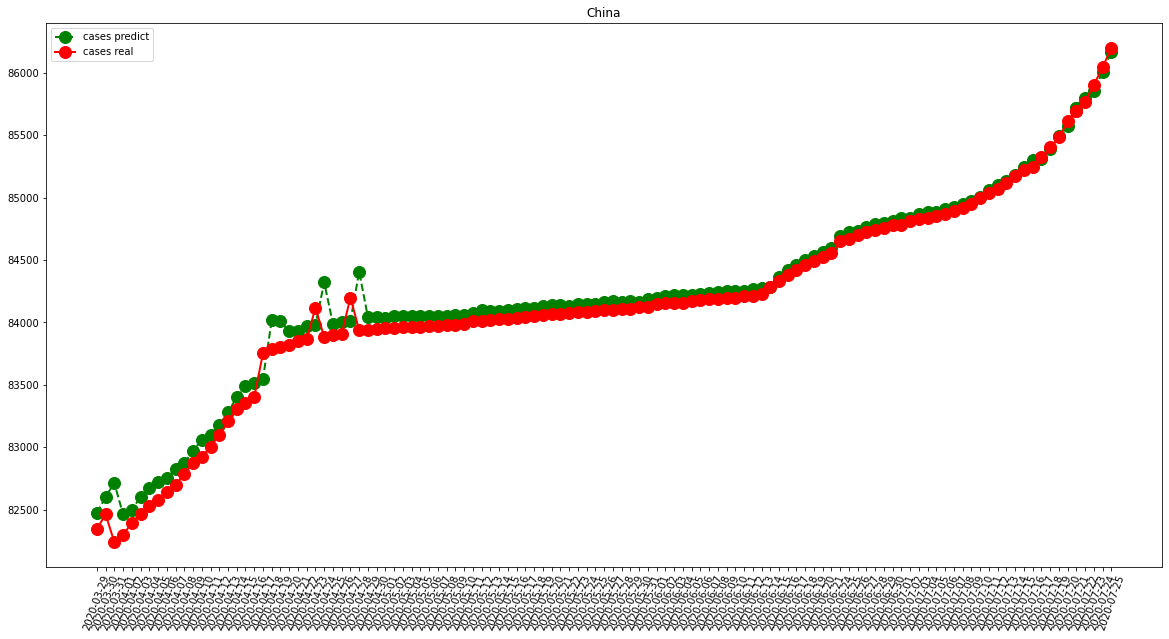

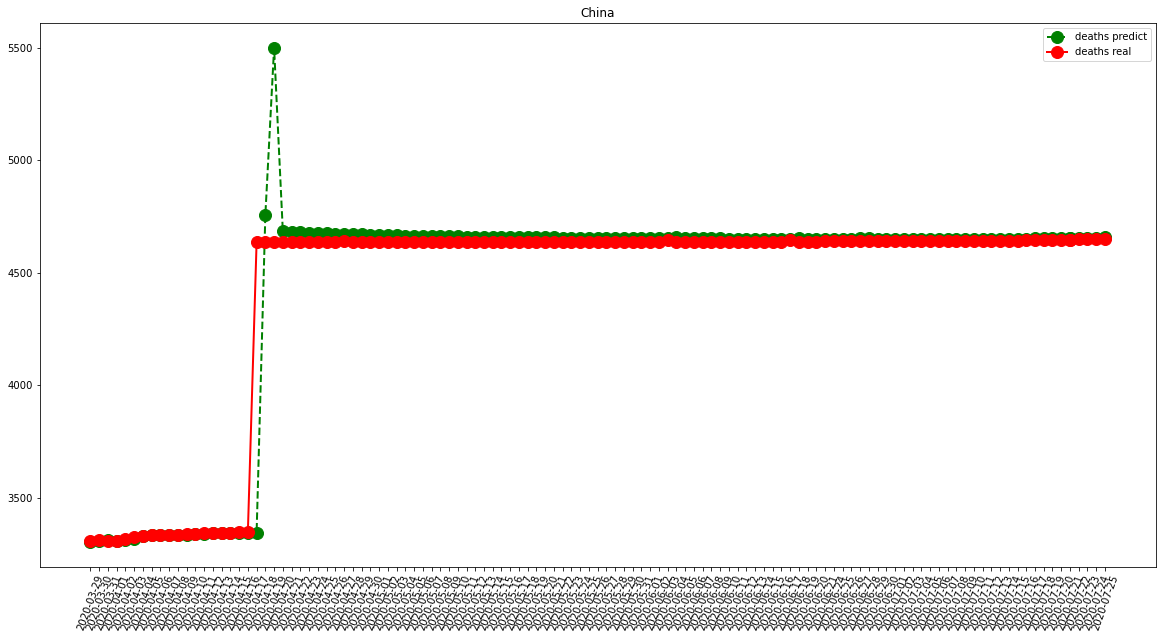

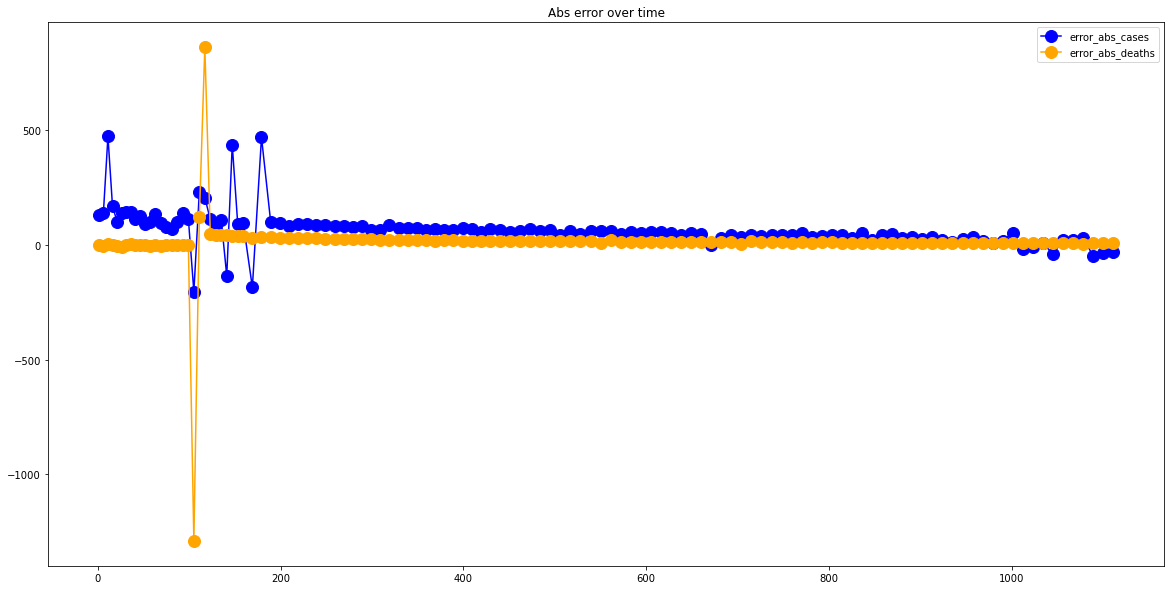

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1345.7222222222222
RMSE =  4398.802964696443
-- United Kingdom performances for deaths --
MAE =  208.82222222222222
RMSE =  516.9292236101788


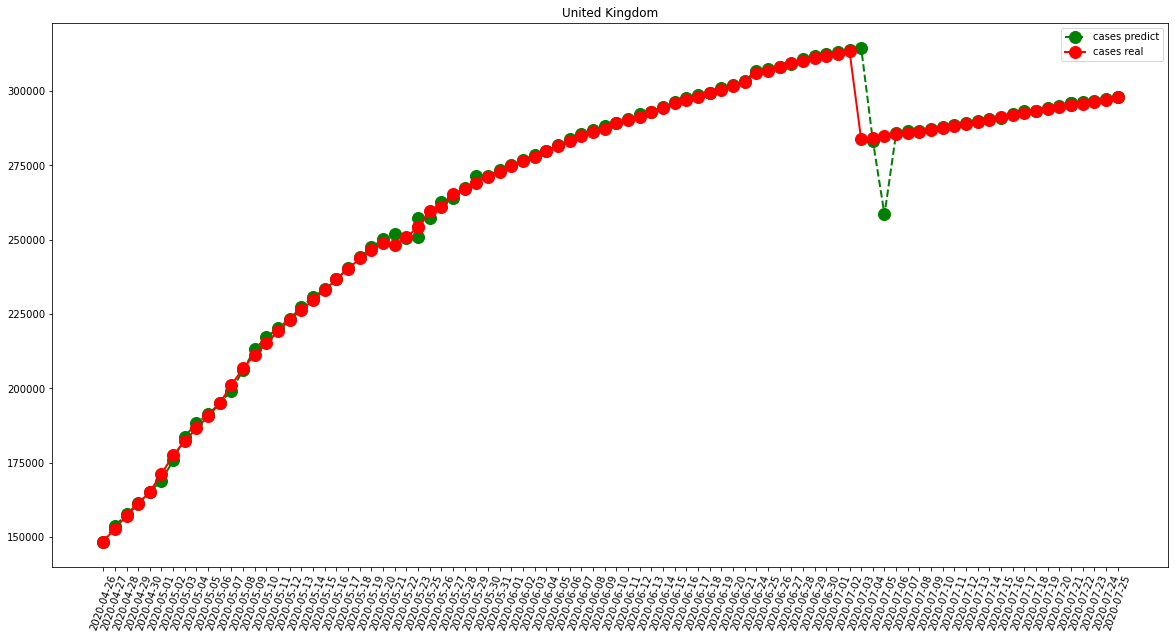

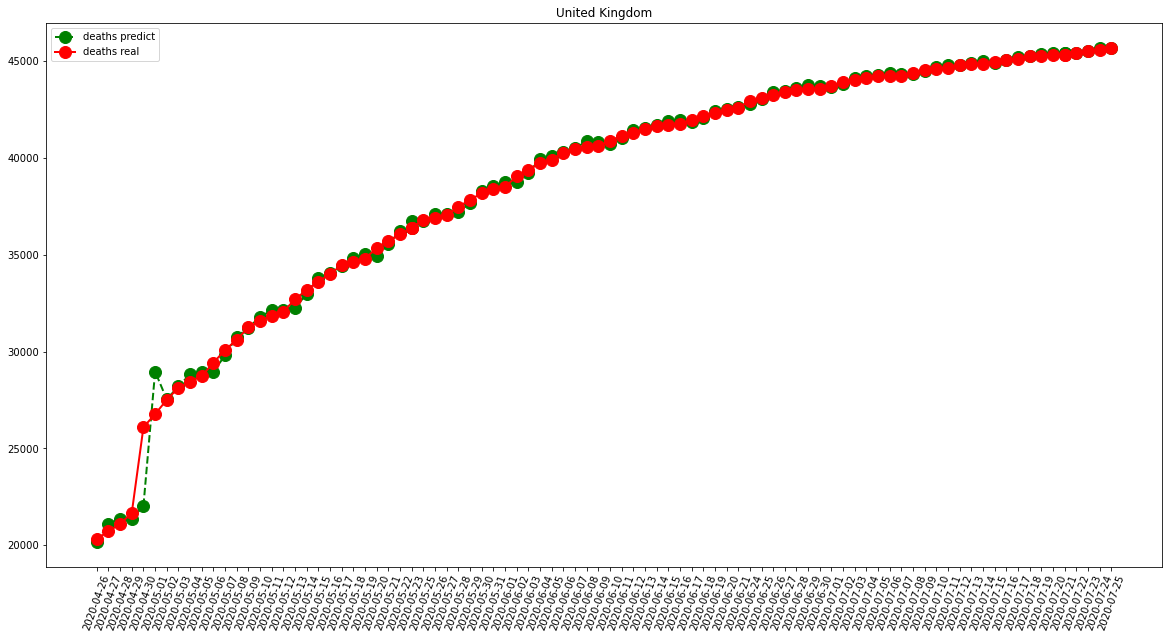

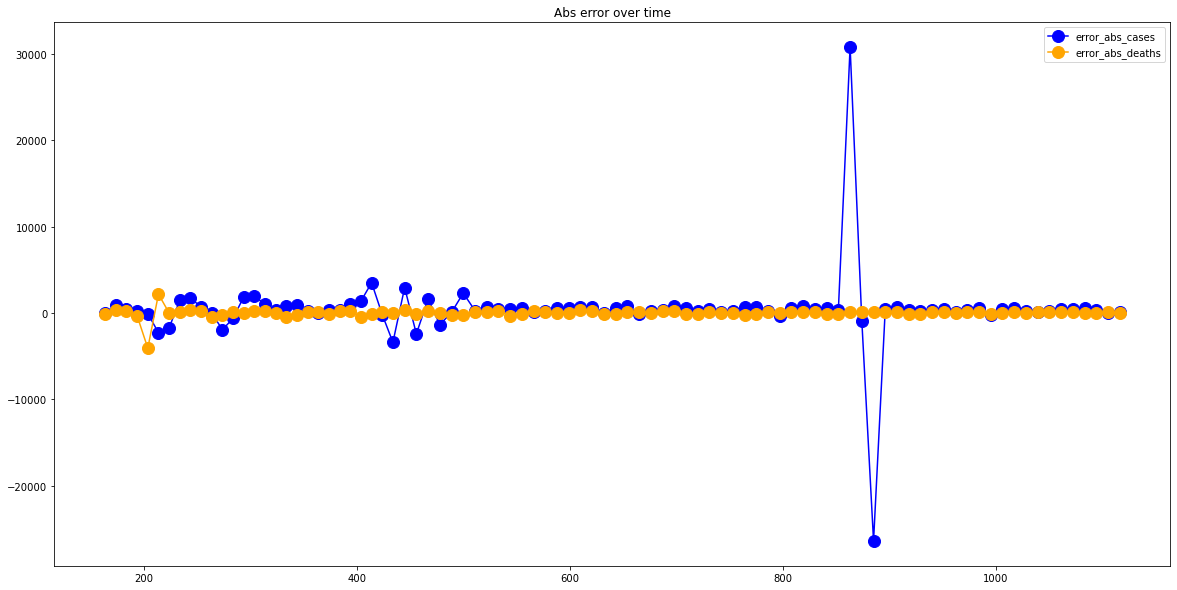

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  290.72222222222223
RMSE =  407.7266922284529
-- Germany performances for deaths --
MAE =  26.433333333333334
RMSE =  46.02016466241245


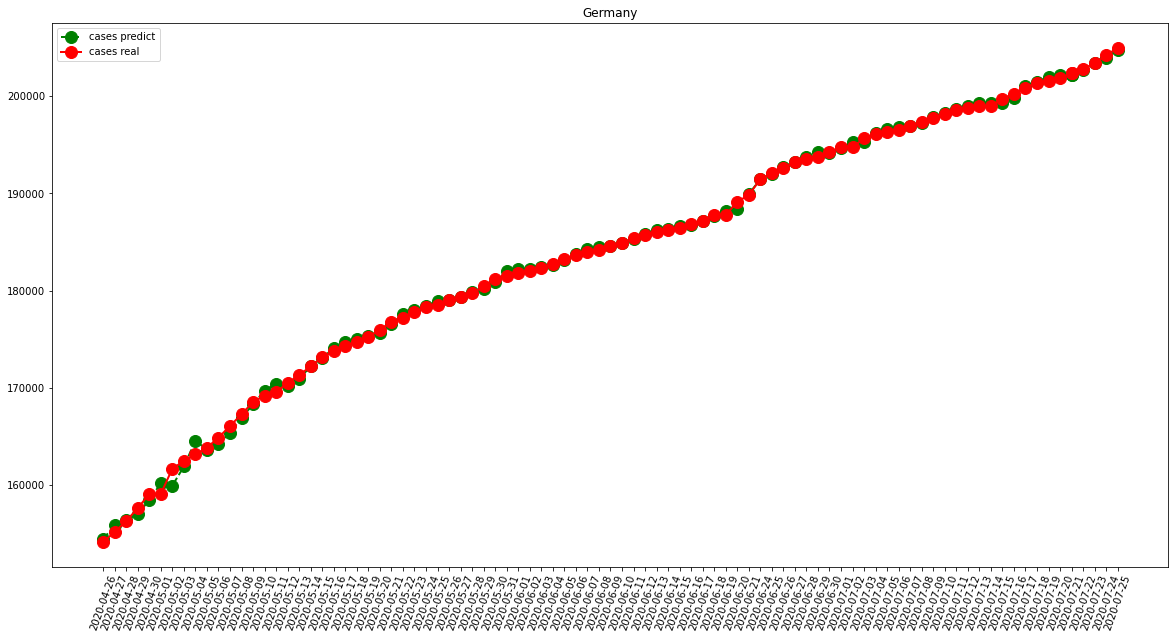

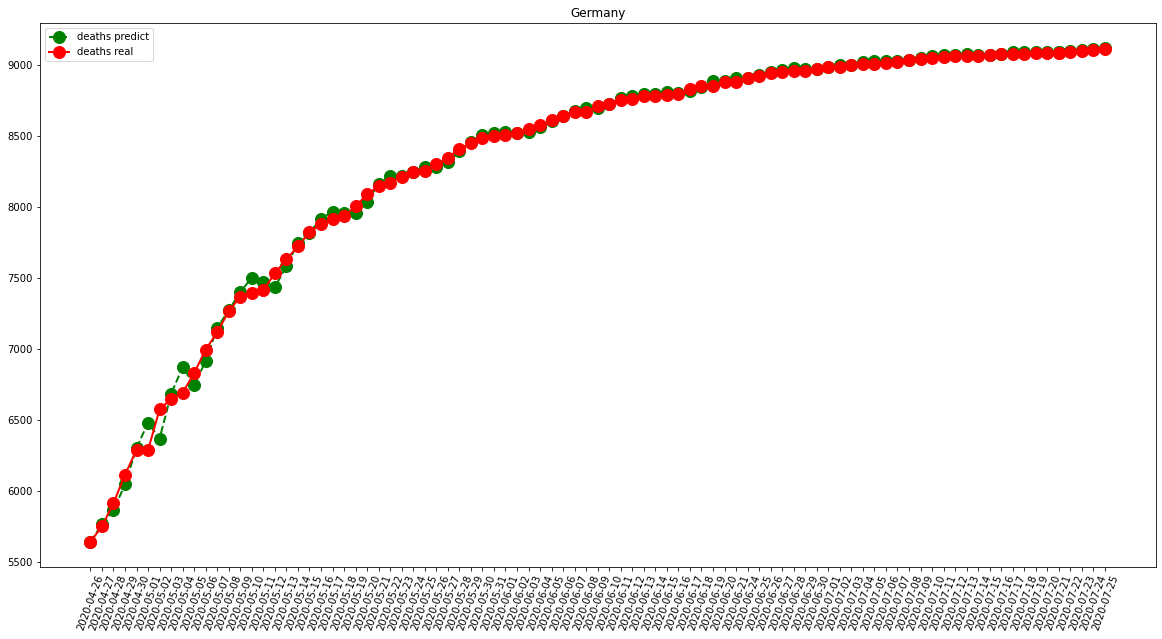

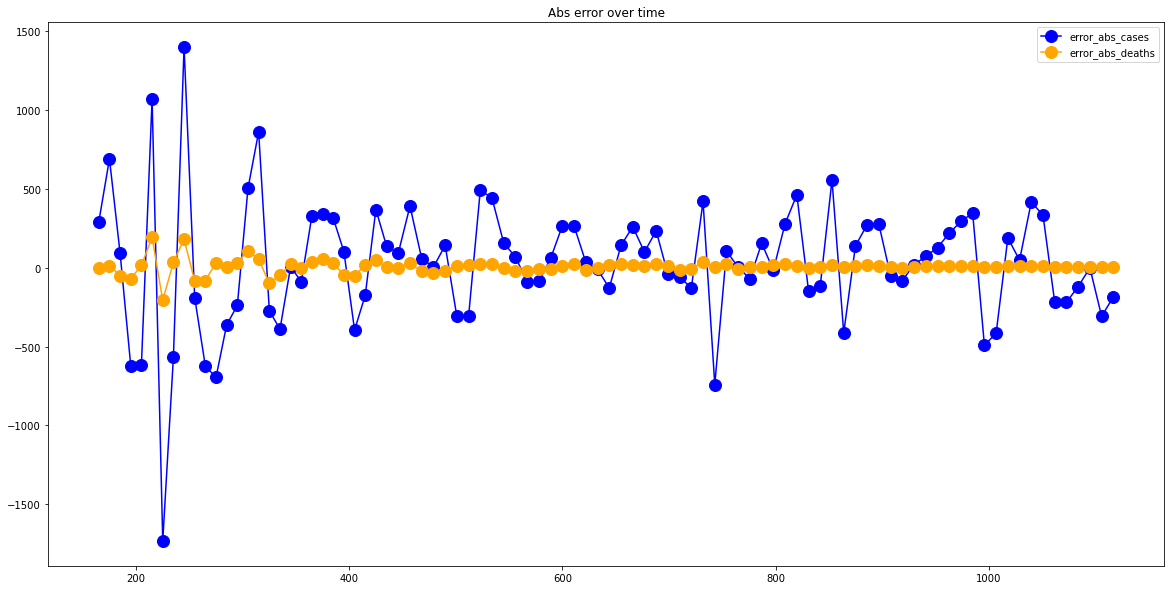

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  461.3333333333333
RMSE =  656.8127248733505
-- Iran performances for deaths --
MAE =  22.27777777777778
RMSE =  36.33195716048216


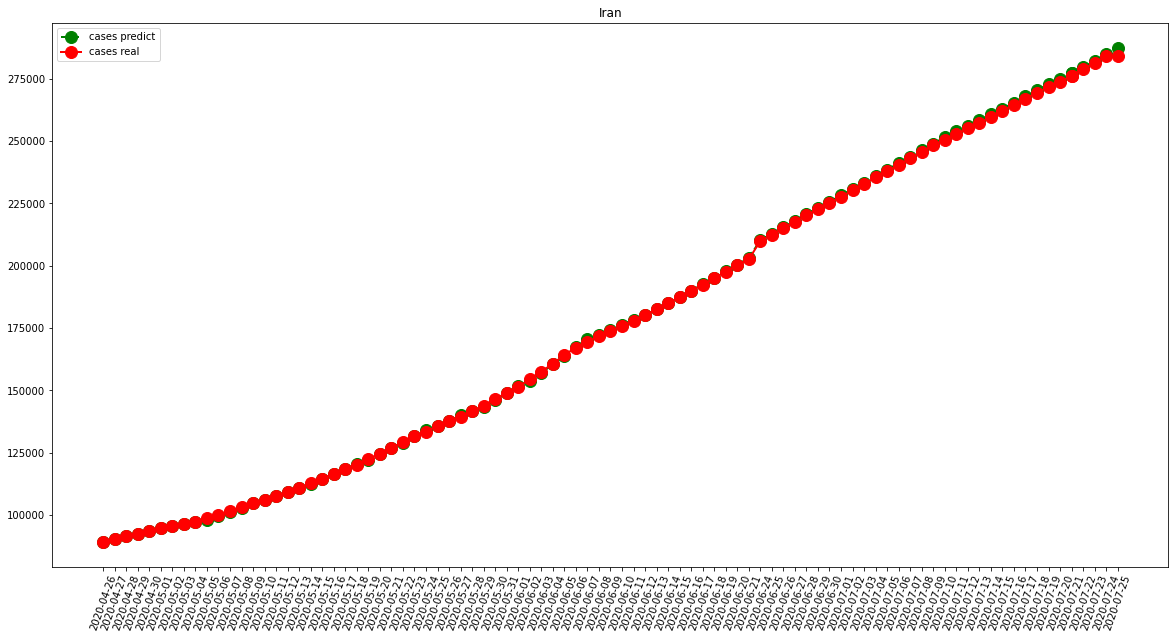

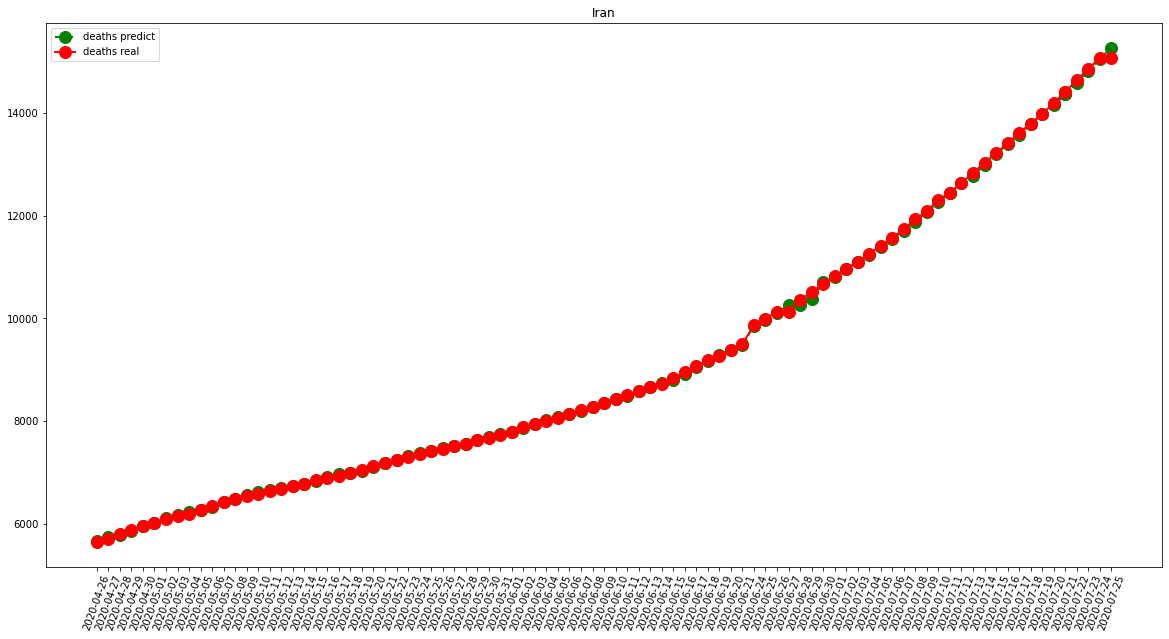

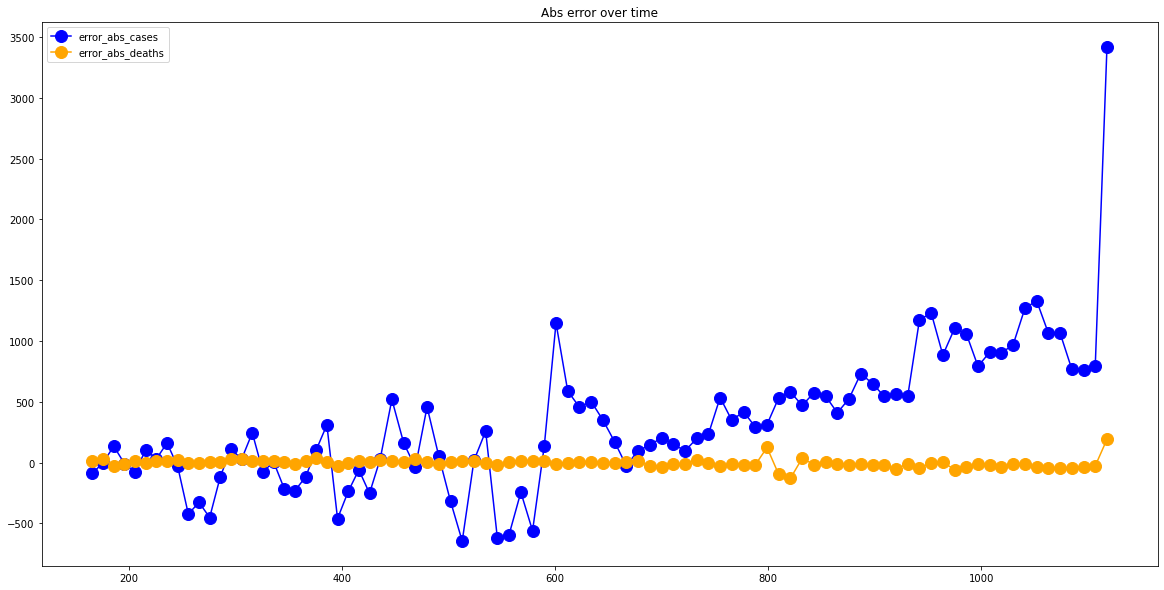

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  213.03333333333333
RMSE =  362.24637104232437
-- Turkey performances for deaths --
MAE =  20.844444444444445
RMSE =  106.99854619988484


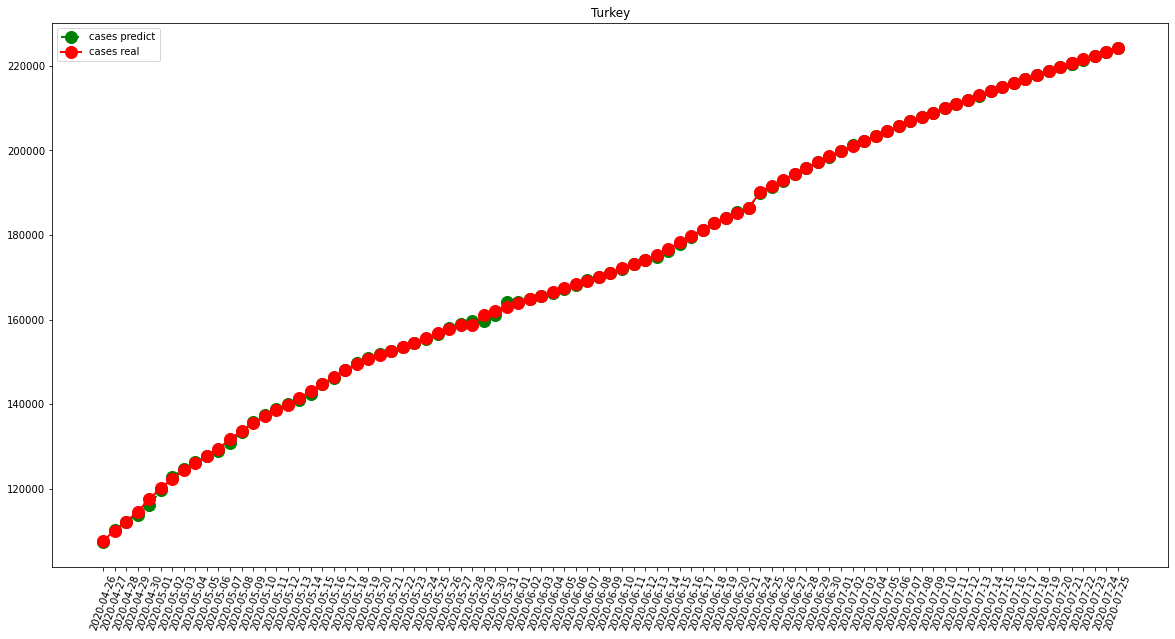

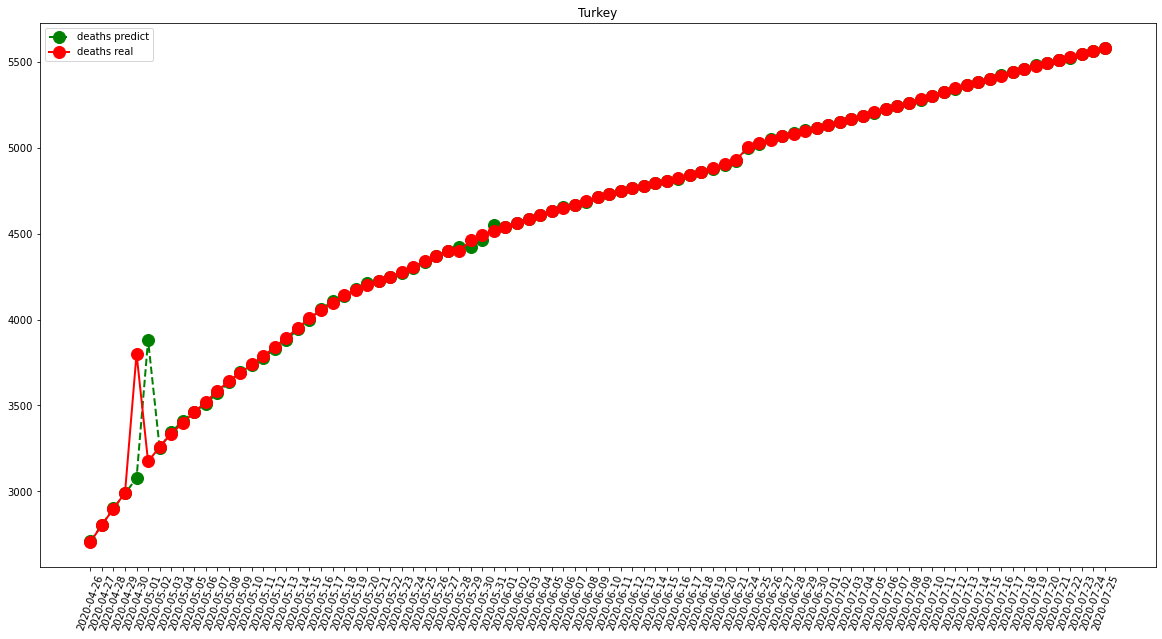

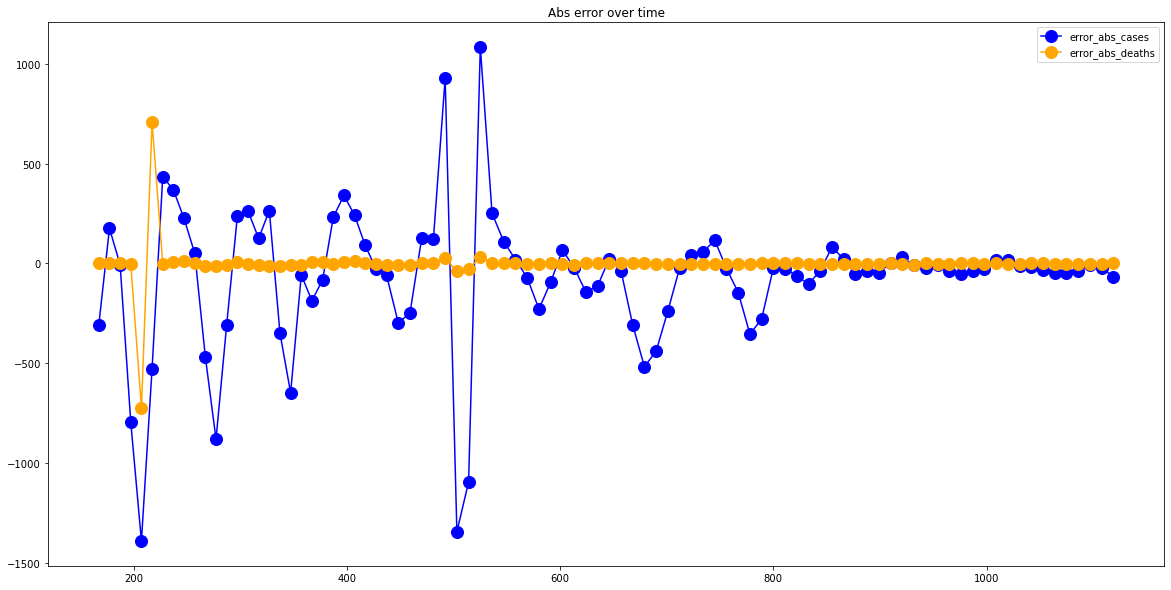

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  10776.396825396825
RMSE =  14108.13358618759
-- Brazil performances for deaths --
MAE =  373.57142857142856
RMSE =  460.7143004798816


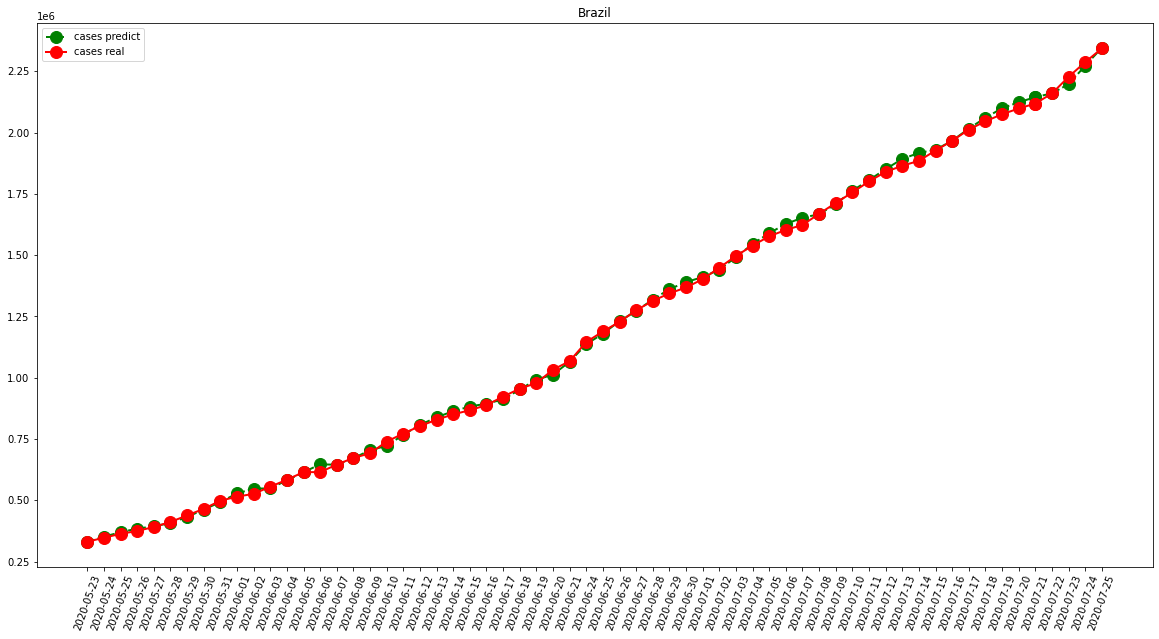

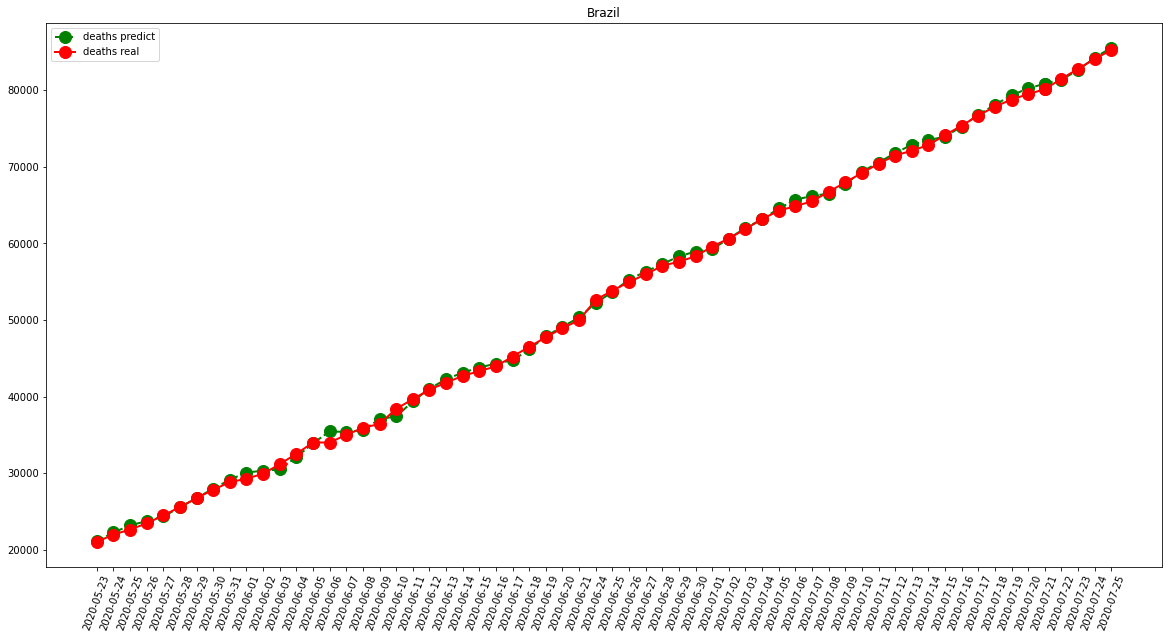

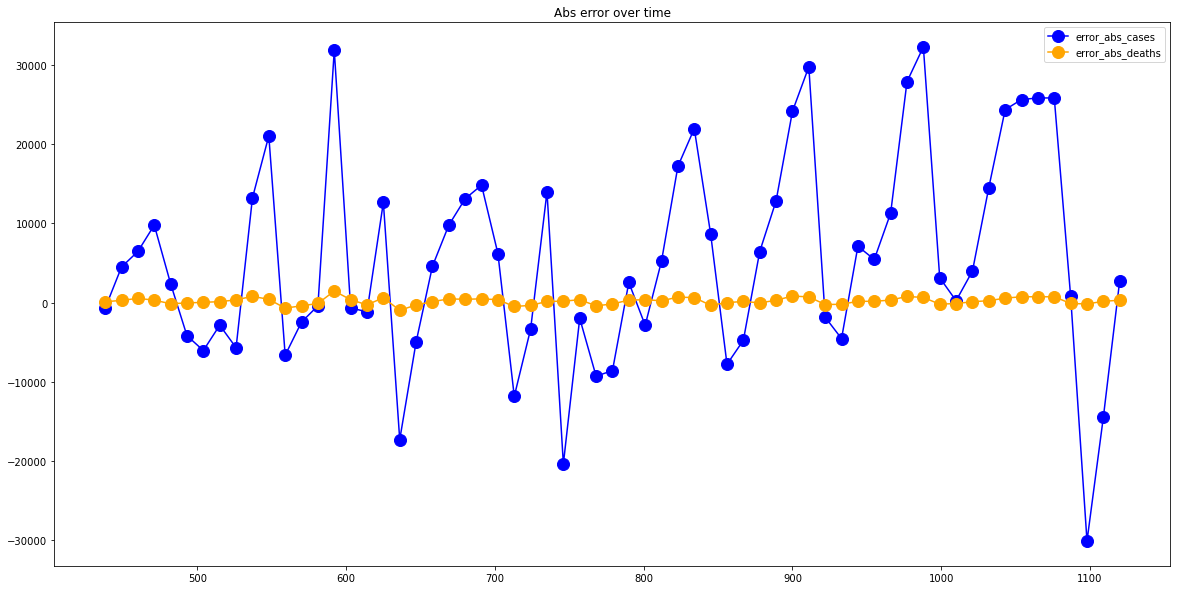

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)